In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from random import sample
from sklearn import preprocessing

# Question 1.1

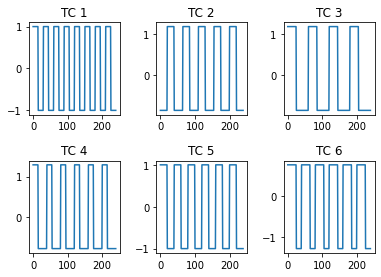

In [2]:
# declare the vectors
AV = [0, 20, 0, 0, 0, 0]
IV = [30, 45, 60, 40, 40, 40]
dur_of_ones = [15, 20, 25, 15, 20, 25]

# create empty TC
TC = np.zeros((240, 6))

# create the six temporal sources
for av, iv, ones, column in zip(AV, IV, dur_of_ones, TC.T):
    while(av < 240):
        stop_one = av + ones
        column[av:stop_one] = 1
        av = av + iv
    

# standardise the temporal source
for i in range(0, 6):
    TC.T[i] = (TC.T[i] - TC.T[i].mean())/TC.T[i].std()
        
    
# making subplots
fig, ax = plt.subplots(2, 3)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.5)

# draw the 6 subplots of TC
for n in range(0, 6):
    if (n < 3):
        ax[0, n].plot(TC.T[n])
        ax[0, n].set_title('TC ' + str(n+1))
    else:
        ax[1, n-3].plot(TC.T[n])
        ax[1, n-3].set_title('TC ' + str(n+1))

    
plt.show()
fig.savefig('./plots/question_1a')


# Question 1.2

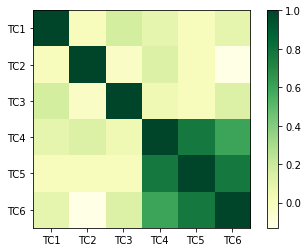

In [3]:
# plot the correlation matrix
labels = ['TC1', 'TC2', 'TC3', 'TC4', 'TC5', 'TC6']
values = [0, 1, 2, 3, 4, 5]

fig, ax = plt.subplots(1, 1)
image = ax.imshow(np.corrcoef(TC.T), cmap='YlGn')

# add color bar
fig.colorbar(image)

# set the labels
ax.set_xticks(values)
ax.set_xticklabels(labels)
ax.set_yticks(values)
ax.set_yticklabels(labels)

fig.savefig('./plots/question_1b')
plt.show()



# Question 1.3

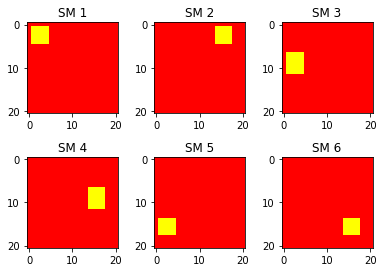

In [4]:
# create the tmpSM array as required
count = 6
tmpSM = np.zeros((count, 21, 21))

tmpSM[0][1:5, 1:5] = 1
tmpSM[1][1:5, 14:18] = 1
tmpSM[2][7:12, 1:5] = 1
tmpSM[3][7:12, 14:18] = 1
tmpSM[4][14:18, 1:5] = 1
tmpSM[5][14:18, 14:18] = 1

# making subplots
fig, ax = plt.subplots(2, 3)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

# draw the 6 subplots of SM
for n in range(0, count): 
    if (n < 3):
        ax[0, n].imshow(tmpSM[n], cmap='autumn')
        ax[0, n].set_title('SM ' + str(n+1))
    else:
        ax[1, n-3].imshow(tmpSM[n], cmap='autumn')
        ax[1, n-3].set_title('SM ' + str(n+1))

    
plt.show()
fig.savefig('./plots/question_1c')


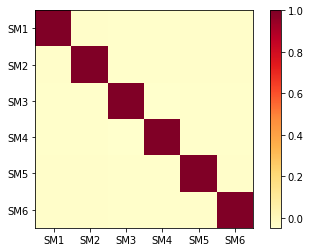

In [5]:
# create 6x441 SM from tmpSM
SM = tmpSM.reshape(6,441)

# plot the correlation matrix
SM_labels = ['SM1', 'SM2', 'SM3', 'SM4', 'SM5', 'SM6']
values = [0, 1, 2, 3, 4, 5]

fig, ax = plt.subplots(1, 1)
SM_image = ax.imshow(np.corrcoef(SM), cmap='YlOrRd')

# add color bar
fig.colorbar(SM_image)

# set the labels
ax.set_xticks(values)
ax.set_xticklabels(SM_labels)
ax.set_yticks(values)
ax.set_yticklabels(SM_labels)

fig.savefig('./plots/question_1b2')
plt.show()

# Question 1.4

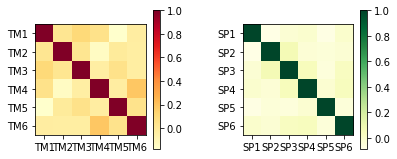

In [11]:
# set the variance for the noises
var_temp = 0.25
var_spa = 0.015
mean = 0

# generate the gaussian noises
noise_temp = np.random.normal(mean, math.sqrt(var_temp), 1440).reshape(240, 6)
noise_spa = np.random.normal(mean, math.sqrt(var_spa), 2646).reshape(6, 441)

# plot the correlation matrix for noises
TM_labels = ['TM1', 'TM2', 'TM3', 'TM4', 'TM5', 'TM6']
SP_labels = ['SP1', 'SP2', 'SP3', 'SP4', 'SP5', 'SP6']
values = [0, 1, 2, 3, 4, 5]

fig, ax = plt.subplots(1, 2)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.4)

# plot the matrix
noise_temp_image = ax[0].imshow(np.corrcoef(noise_temp.T), cmap='YlOrRd')
noise_spa_image = ax[1].imshow(np.corrcoef(noise_spa), cmap='YlGn')

# add color bar
fig.colorbar(noise_temp_image, ax=ax[0], shrink=0.6)
fig.colorbar(noise_spa_image, ax=ax[1], shrink=0.6)

# set the labels for temporal sources
ax[0].set_xticks(values)
ax[0].set_xticklabels(TM_labels)
ax[0].set_yticks(values)
ax[0].set_yticklabels(TM_labels)

# set the labels for spatial sources
ax[1].set_xticks(values)
ax[1].set_xticklabels(SP_labels)
ax[1].set_yticks(values)
ax[1].set_yticklabels(SP_labels)

plt.show()
fig.savefig('./plots/corr_matrix_1.4.png')


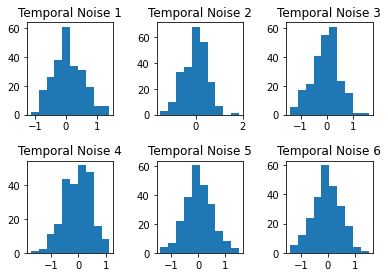

In [12]:
# plot histogram for temporal noise sources
# making subplots
fig, ax = plt.subplots(2, 3)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.5)

# draw the 6 subplots of temporal noise histogram
for n in range(0, 6): 
    if (n < 3):
        ax[0, n].hist(noise_temp.T[n])
        ax[0, n].set_title('Temporal Noise ' + str(n+1))
    else:
        ax[1, n-3].hist(noise_temp.T[n])
        ax[1, n-3].set_title('Temporal Noise ' + str(n+1))

fig.savefig('./plots/temporal_hist_1.4.png')
plt.show()

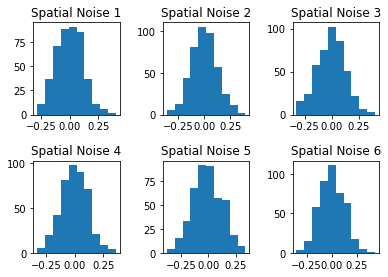

In [13]:
# plot histogram for spatial noise sources
# making subplots
fig, ax = plt.subplots(2, 3)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.5)

# draw the 6 subplots of spatial noise histogram
for n in range(0, 6): 
    if (n < 3):
        ax[0, n].hist(noise_spa[n])
        ax[0, n].set_title('Spatial Noise ' + str(n+1))
    else:
        ax[1, n-3].hist(noise_spa[n])
        ax[1, n-3].set_title('Spatial Noise ' + str(n+1))

fig.savefig('./plots/spatial_hist_1.4.png')
plt.show()

# Question 1.5

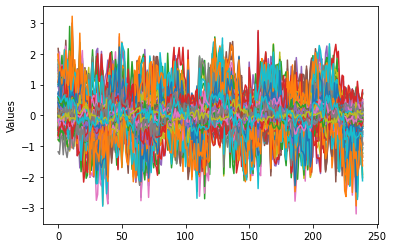

In [14]:
# generate the synthetic dataset
X = np.matmul((TC + noise_temp), (SM + noise_spa))

# generate TC * spatial noises and temporal noises * SM
TC_noise_spa = np.matmul(TC, noise_spa)
noise_temp_SM = np.matmul(noise_temp, SM)

# randomly select 120 variables
range_of_index = [i for i in range(0, X.shape[1])]
sample_index = sample(range_of_index, 120)

fig, ax = plt.subplots()

# plot the time series plot
ax.plot(np.arange(0,240), X.T[sample_index[0]])
sample_index.pop(0)

for i in sample_index:
    ax.plot(X.T[i])
    
# set the labels
ax.set_ylabel('Values')

plt.show()
fig.savefig('./plots/timeseries_1.5.png')

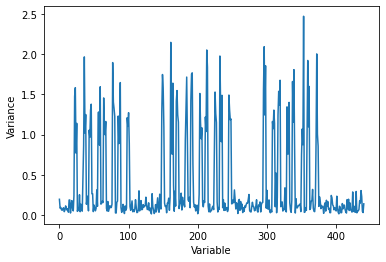

In [15]:
fig, ax = plt.subplots()

# plot the variance of all 441 variables
ax.plot(np.arange(0,441), np.var(X, axis=0))

# set x and y labels
plt.ylabel('Variance')
plt.xlabel('Variable')

fig.savefig('./plots/variance_1.5.png')

In [16]:
# standardise X
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

# Question 2.1

In [25]:
# estimate A using least squares
D = TC
DTD = np.matmul(D.T, D)
DTD_inv = np.linalg.inv(DTD)
A_LSR = np.matmul(np.matmul(DTD_inv , D.T), X)
A_LSR

# retreive TCs in DLSR
D_LSR = np.matmul(X, A_LSR.T)


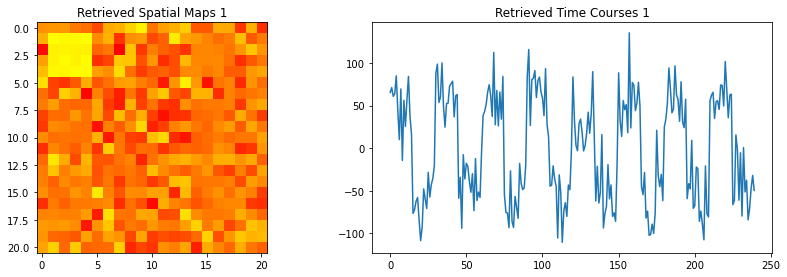

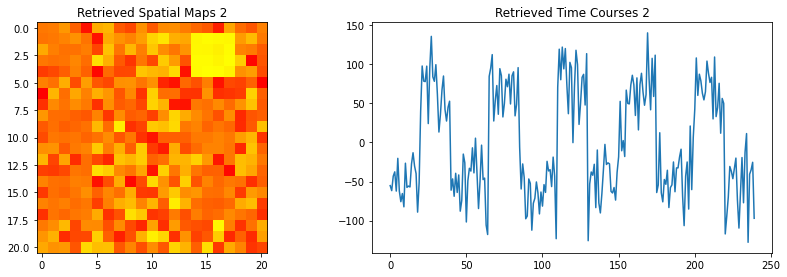

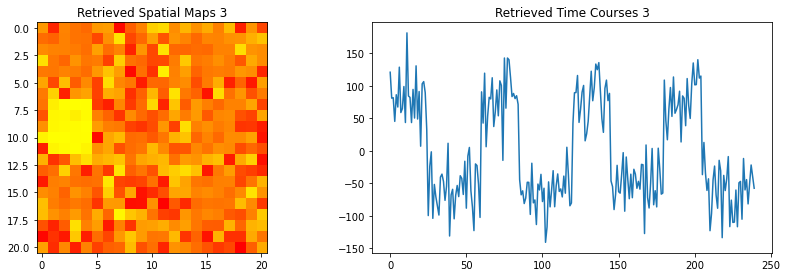

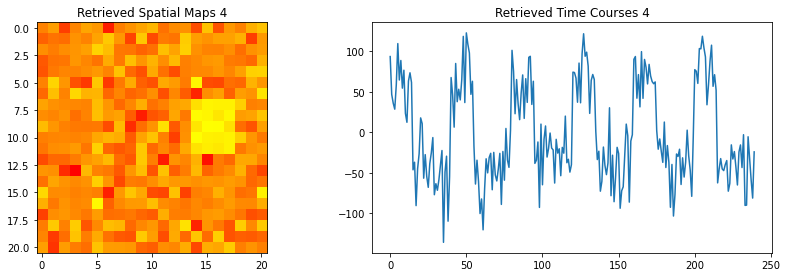

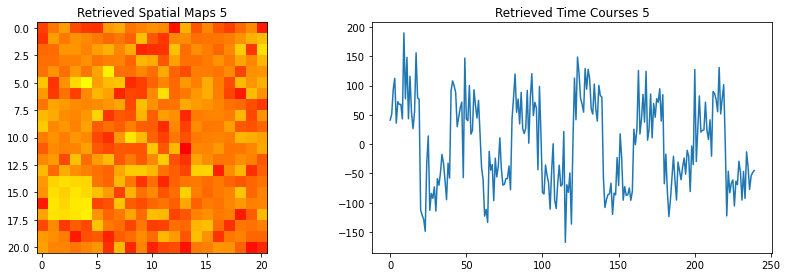

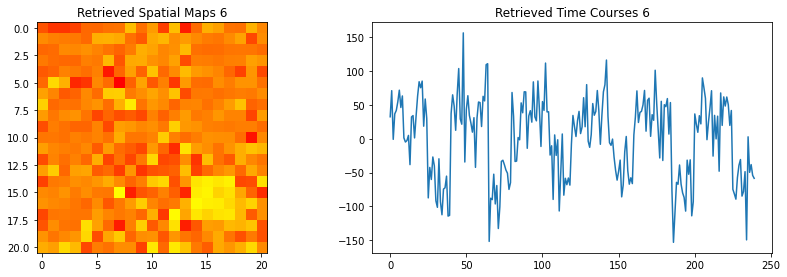

In [80]:
reshape_A_LSR = A_LSR.reshape(6, 21, 21)

for i in range(0, 6):

    fig, ax = plt.subplots(1, 2)

    # set the spacing between subplots
    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=2, 
                        top=0.9, 
                        wspace=0.05, 
                        hspace=0.1)

    # plot the retrieved sources
    ax[0].imshow(reshape_A_LSR[i], cmap='autumn')
    ax[0].set_title('Retrieved Spatial Maps ' + str(i+1))
    ax[1].plot(D_LSR.T[i])
    ax[1].set_title('Retrieved Time Courses ' + str(i+1))

    fig.savefig('./plots/retrieved_sources_' + str(i+1) + '.png')
    plt.show()